# Ejercicio 16

## Enunciado
Crea un programa que:

1. Lea los datos del fichero **registros.csv** pertenecientes al uso de una aplicación.
2. Genere un gráfico tipo tarta junto con un gráfico de barras dónde se muestre como se distribuyen las conexiones y duración total en función del día de la semana.

## Aclaraciones:
Lo que se pide es trasladar a un gráfico de tipo pastel el número total de conexiones que se dan en función del día de la semana así como la suma de sus duraciones en un gráfico de barras.

### ¿Qué cosas nuevas necesitamos saber?
- Gráficos tipo pastel.
- Figuras con más de un gráfico.

### Gráficos tipo pastel

Veamos directamente como hacer un gráfico circular o de pastel mediante un ejemplo:

In [1]:
# recordad que es necesario hacer los import precedentes
from matplotlib import pyplot as plt
%matplotlib inline

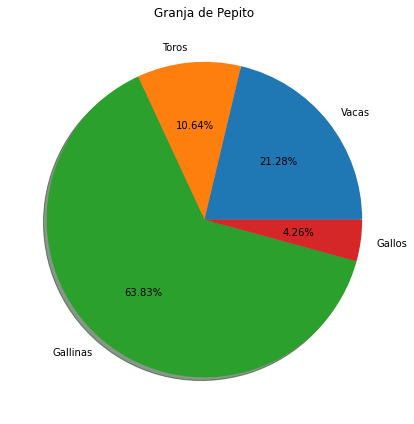

In [2]:
animales = ['Vacas', 'Toros', 'Gallinas', 'Gallos']
cuantos = [100, 50, 300, 20]

plt.figure(figsize=(13, 6)) # creamos nuestra figura
plt.pie(cuantos, labels=animales, shadow=True, autopct='%.2f%%') # shadow es para pintar la sombra
# y autopct con ese valor es para pintar los porcentajes con 2 decimales
plt.title("Granja de Pepito")
plt.tight_layout()
plt.show()

### Figuras con más de un gráfico.

Veamos ahora como crear figuras con más de un gráfico.

Siguiendo el mismo ejemplo, comparemos la granja de Pepito con la de José.

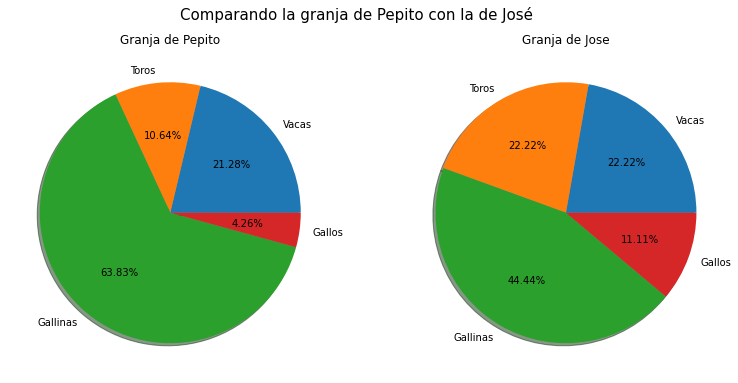

In [3]:
animales = ['Vacas', 'Toros', 'Gallinas', 'Gallos']
cuantos_pepito = [100, 50, 300, 20]
cuantos_jose = [100, 100, 200, 50]

fig, ax = plt.subplots(1, 2, figsize=(13,6)) # 1 fila, 2 columnas -> 2 gráficos
# cada uno de ellos estará en ax

# creamos el primero
ax[0].pie(cuantos_pepito, labels=animales, shadow=True, autopct='%.2f%%') # gráfico que pintamos en el primero
ax[0].set_title("Granja de Pepito") # titulo del primero

# creamos el segundo
ax[1].pie(cuantos_jose, labels=animales, shadow=True, autopct='%.2f%%') # gráfico del segundo
ax[1].set_title("Granja de Jose") # título del segundo

fig.suptitle("Comparando la granja de Pepito con la de José", size=15) #título e la figura
plt.show()

Antes de comenzar, quizás te sea útil pasarte por [aquí](https://docs.python.org/3/library/datetime.html#datetime.date.weekday) para saber como obtener el día de la semana a partir de un datetime().

Suerte!

## Solución

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
from datetime import datetime

In [6]:
with open('../Otros/registros.csv', 'r') as f:
    texto = f.read()
    f.close()

In [7]:
texto_en_filas = texto.splitlines()

In [8]:
# analicemos nuestros datos
for fila in texto_en_filas[:5]:
    print(fila)

fecha_hora_conexion;duracion_conexion
2020/03/05 21:00;57
2020/03/06 23:00;42
2020/03/08 18:00;134
2020/03/06 20:00;25


In [9]:
# analicemos nuestros datos
for fila in texto_en_filas[-5:]:
    print(fila)

2020/03/02 21:00;49
2020/03/03 23:00;26
2020/03/08 18:00;59
2020/03/05 21:00;59
2020/03/06 20:00;58


In [10]:
# como podemos comprobar tenemos cabeceras en la primera fila, 2 campos y separados por ;
def formatea_registro(fila):
    fecha_texto, duracion_texto = fila.split(";")
    fecha = datetime.strptime(fecha_texto, "%Y/%m/%d %H:%M")
    registro = {
        'dia_semana': fecha.isoweekday(),
        'hora': fecha.hour,
        'fecha': fecha,
        'duracion': int(duracion_texto)
    }
    return registro

In [11]:
registros = list(map(formatea_registro, texto_en_filas[1:]))

In [12]:
dias_semana = {
    1: 'Lunes',
    2: 'Martes',
    3: 'Miercoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sábado',
    7: 'Domingo'
}

In [13]:
conexiones_por_dia = {k: 0 for k in dias_semana.keys()}
uso_por_dia = {k: 0 for k in dias_semana.keys()}

In [14]:
for registro in registros:
    dia_semana = registro.get("dia_semana")
    conexiones_por_dia[dia_semana] = conexiones_por_dia[dia_semana] + 1
    uso_por_dia[dia_semana] = uso_por_dia[dia_semana] + registro.get("duracion")

In [15]:
labels = list(dias_semana.values())
usos = [v for v in conexiones_por_dia.values()]
duraciones = [v for v in uso_por_dia.values()]

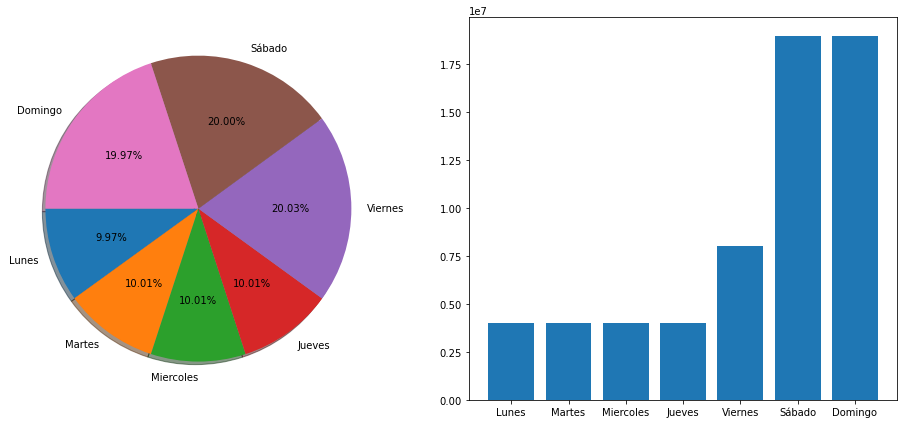

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ax[0].pie(usos, labels=labels, shadow=True, startangle=180, autopct='%1.2f%%')
ax[1].bar(labels, duraciones)
fig.tight_layout()
plt.show()